In [425]:
import os
import pandas as pd
import numpy as np
import statsmodels
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import xgboost
import math
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

print('lib imported')

lib imported


In [299]:
cwd = os.getcwd()
print(cwd)

/Users/Q/Documents/udacityDataScientist/project1


## Business Understanding

#### Three Questions

1.	Does the geographic location of the Air BNB listings have impact on the price of the listing?  Which neighborhood has the highest average price?
2.	Is there any seasonal fluctuation of listing prices? For example, the summer months and high seasons such as end of year around Christmas and new year.
3.	What are the factors/features that significantly influence the price of the listings?



## Data Understanding

##### In this project, we're using Seattle AirBnB data. The dataset contains 3 sub datasets

* Listing: includes all the attributes of listing and review scores
* Reviews: includes all the original reviews and the id that uniquely identify the reviewers
* Calendar: includes the availability of all the listing and their price of each calendar day.   


In [300]:
# load all the dataset as dataframe
dfListing = pd.read_csv('data/listings.csv')
dfCalendar = pd.read_csv('data/calendar.csv')

In [301]:
dfReviews = pd.read_csv('data/reviews.csv')

In [302]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

### Inspect the Listing dataset

In [303]:
dfListing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [304]:
dfListing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [305]:
dfListing[dfListing.duplicated()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [306]:
dfListing.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [307]:
# describe the dataset
print(dfListing.describe(include='all'))

                  id                           listing_url     scrape_id  \
count   3.818000e+03                                  3818  3.818000e+03   
unique           NaN                                  3818           NaN   
top              NaN  https://www.airbnb.com/rooms/1826155           NaN   
freq             NaN                                     1           NaN   
mean    5.550111e+06                                   NaN  2.016010e+13   
std     2.962660e+06                                   NaN  0.000000e+00   
min     3.335000e+03                                   NaN  2.016010e+13   
25%     3.258256e+06                                   NaN  2.016010e+13   
50%     6.118244e+06                                   NaN  2.016010e+13   
75%     8.035127e+06                                   NaN  2.016010e+13   
max     1.034016e+07                                   NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3

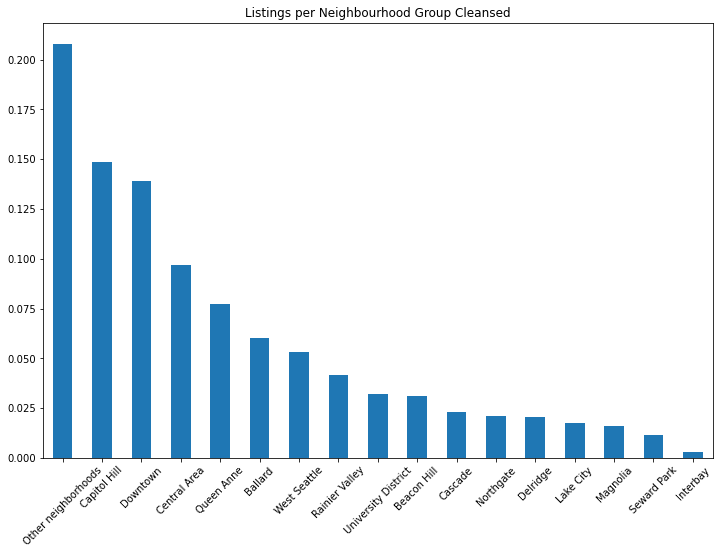

In [395]:
# Explore Feature: neighborhood_group_cleansed
plt.figure(figsize=(12,8))
nbh_vals = dfListing['neighbourhood_group_cleansed'].value_counts()
(nbh_vals/dfListing.shape[0]).plot(kind="bar");
plt.title("Listings per Neighbourhood Group Cleansed");
plt.xticks(rotation=45)
plt.savefig("Listings per Neighbourhood Group Cleansed");

Majority of the listings are in the Capitol Hill and Downtown area

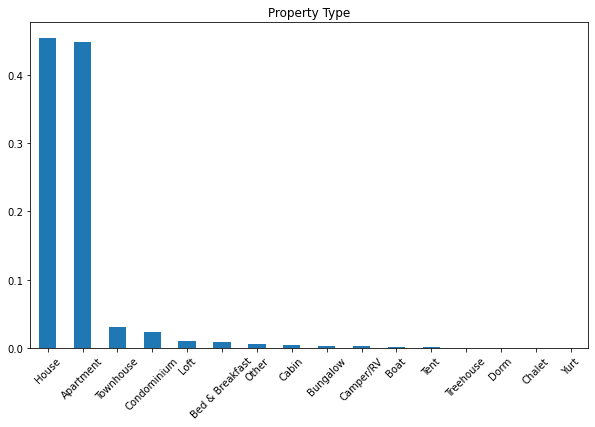

In [396]:
# Explore Feature: property_type
plt.figure(figsize=(10,6))
prop_vals = dfListing['property_type'].value_counts()
(prop_vals/dfListing.shape[0]).plot(kind="bar");
plt.xticks(rotation=45)
plt.title("Property Type");
plt.savefig("Property Type");

Majority of AirBnB listings are houses and apartments

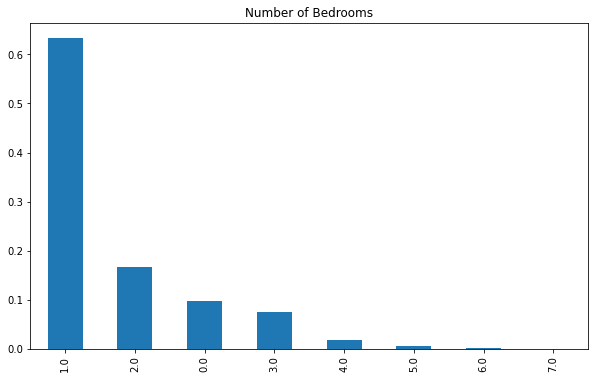

In [310]:
# Explore Feature: neighborhood_group_cleansed
plt.figure(figsize=(10,6))
bedrooms_vals = dfListing['bedrooms'].value_counts()
(bedrooms_vals/dfListing.shape[0]).plot(kind="bar");
plt.title("Number of Bedrooms");

 Looks like that majority of AirBnB listing only has 1 room

In [311]:
# Take a look of the review_scores_rating and identify the general trend of rating 

dfListing['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,3171.000000
1,mean,94.539262
2,std,6.606083
3,min,20.000000
4,25%,93.000000
5,50%,96.000000
6,75%,99.000000
7,max,100.000000


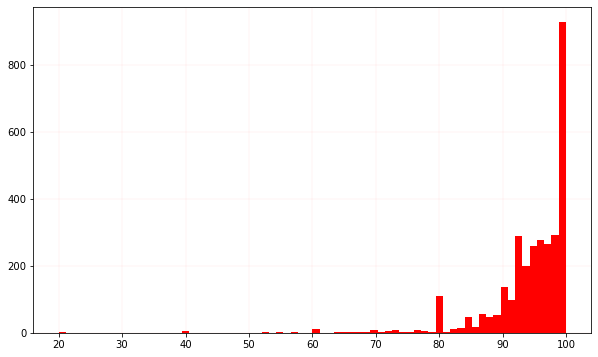

In [312]:
dfListingRating = dfListing['review_scores_rating'].dropna()

# plot histgram
plt.figure(figsize=(10, 6))
plt.hist(dfListingRating.values, bins=70, color='r')
plt.grid(color='r', linewidth= 0.05)

From the plot above, we can see that majority of the AirBnB listing have rating scores higher than 90. 
It seems that most of Air BnB customers are happy about their accommodation

##### Inpsect calendar dataset

Question: Is there any seasonal fluctuation of listing prices? For example, the summer months and high seasons such as end of year around Christmas and new year.

In [313]:
dfCalendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [314]:
dfCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [315]:
dfCalendar[dfCalendar.duplicated()]

,listing_id,date,available,price


In [316]:
dfCalendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [317]:
dfCalendar = dfCalendar.dropna()

In [318]:
dfCalendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [319]:
# convert date column type to date 
dfCalendar['date'] = pd.to_datetime(dfCalendar['date'])
# check
type(dfCalendar.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [320]:
type(dfCalendar.price.iloc[0])

str

In [321]:
# The data type of price column in the calendar dataset is str, it should be convert to a float valuedfListing['price'] = dfListing['price'].replace('[\$,]', '', regex=True).astype(float)
dfCalendar['price'] = dfCalendar['price'].replace('[\$,]', '', regex=True).astype(float)
# Confirm the conversion 
type(dfCalendar.price.iloc[0])


numpy.float64

In [322]:
dfCalendarCOPY = dfCalendar.copy()

In [323]:
dfCalendarCOPY = dfCalendarCOPY.groupby('date')['price'].mean().reset_index()


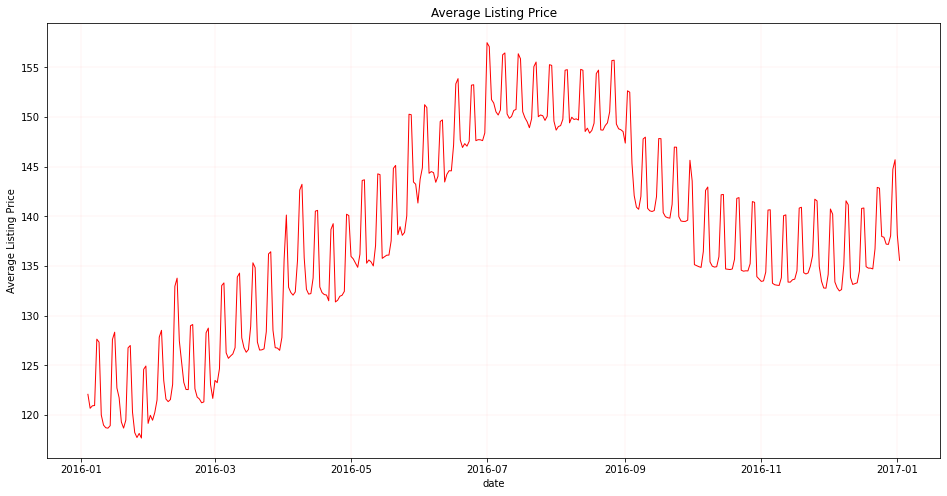

In [324]:
plt.figure(figsize=(16, 8))
plt.plot(dfCalendarCOPY.date, dfCalendarCOPY.price, color='r', linewidth=1)
plt.title("Average Listing Price")
plt.ylabel("Average Listing Price")
plt.xlabel("date")
plt.grid(color='r', linewidth= 0.05)

From the simple plot above, we can see that the summer months: from June to August the average price of listings are higher, and there is an slight increasing in price during end of the year to the firs month of the year.

In [325]:
dfCalendarCOPY['month'] = pd.DatetimeIndex(dfCalendarCOPY['date']).month
dfCalendarCOPY['year'] = pd.DatetimeIndex(dfCalendarCOPY['date']).year

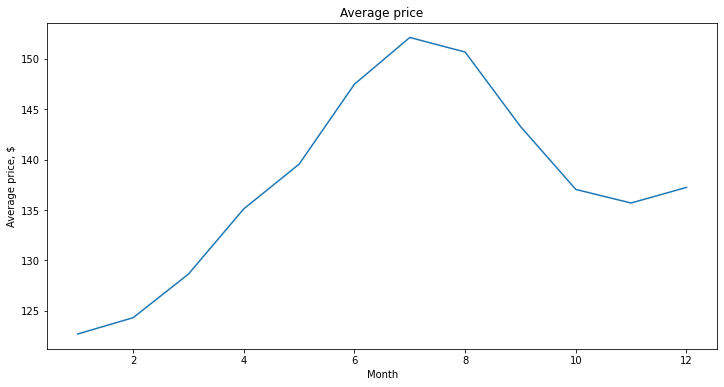

In [326]:
average_price_by_month =dfCalendarCOPY.groupby(['month'])['price'].mean()
plt.figure(figsize=(12,6))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.savefig('average price for month')
plt.show()

From the plot above we can see that the average price is higher in summer month(From Jun to Sep)

##### Inspect the Review dataset

In [327]:
dfReviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [328]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [329]:
dfReviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [330]:
dfReviews = dfReviews.dropna()

In [331]:
dfReviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [332]:
# Describe
print(dfReviews.describe(include='all'))

          listing_id            id        date   reviewer_id reviewer_name  \
count   8.483100e+04  8.483100e+04       84831  8.483100e+04         84831   
unique           NaN           NaN        1929           NaN         14377   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005270e+06  3.058980e+07         NaN  1.701347e+07           NaN   
std     2.472827e+06  1.636519e+07         NaN  1.353705e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725821e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228949e+07         NaN  1.413622e+07           NaN   
75%     4.694479e+06  4.457748e+07         NaN  2.762404e+07           NaN   
max     1.024814e+07  5.873651e+07         NaN  5.281274e+07           NaN   

                                                 comments  
cou

In [333]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84831 non-null  int64 
 1   id             84831 non-null  int64 
 2   date           84831 non-null  object
 3   reviewer_id    84831 non-null  int64 
 4   reviewer_name  84831 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [334]:
# drop columns that we don't need
dfReviews.drop(['reviewer_id', 'reviewer_name'], axis=1, inplace=True)

In [335]:

type(dfReviews.date.iloc[0])

str

In [336]:
# convert date column type to date 
dfReviews['date'] = pd.to_datetime(dfReviews['date'])
# confrim data type has been changed 
type(dfReviews.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [337]:
dfReviewsCOPY= dfReviews.copy()
dfReviewsCOPY = dfReviewsCOPY.groupby('date')['id'].count().reset_index()


In [338]:
#rolling mean 
dfReviewsCOPY["rolling_mean_30"] = dfReviewsCOPY.id.rolling(window=30).mean()

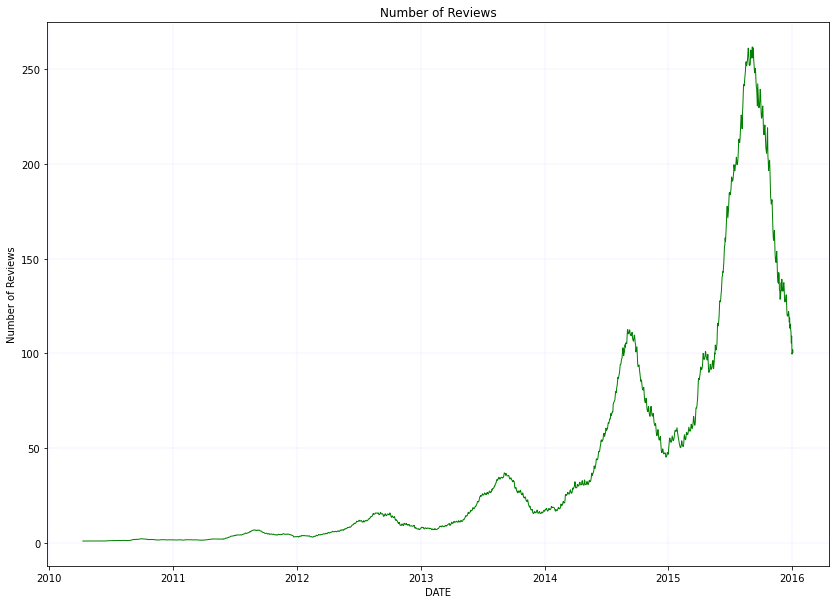

In [404]:
plt.figure(figsize=(14,10))
plt.plot(dfReviewsCOPY.date, dfReviewsCOPY.rolling_mean_30, color ='g', linewidth =1)
plt.xlabel('DATE')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews')
plt.grid(color='b', linewidth= 0.05)
plt.savefig('Numbers of Review & Date')

* From the plot above we can see that the overall trend is an uptrend where the total amount of reviews are incresing from 2010 to 2016. And it indicates that AirBnB are gaining popularity.

* There are couples of spikes in the overall trend line. We will take a look and find the possible explanations.


In [340]:
dfReviewsCOPY['year']=dfReviewsCOPY.date.dt.year


In [341]:
years = dfReviewsCOPY.year.unique()
years    

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [342]:
years = years[1:7]

In [343]:
for year in years:
    dfReviewSub = dfReviewsCOPY[dfReviewsCOPY.year == year]
    valMax = dfReviewSub.rolling_mean_30.max()
    dateMax = dfReviewSub[dfReviewSub.rolling_mean_30 == valMax].date.dt.date.values[0]
    print(year,dateMax,valMax)    

2010 2010-10-04 2.2666666666666666
2011 2011-08-31 6.966666666666667
2012 2012-09-04 16.166666666666668
2013 2013-09-04 37.0
2014 2014-09-03 112.56666666666666
2015 2015-09-05 261.6333333333333


From the observation above we can tell that during the month of September(after summer vacations), we got the most of reviews of AirBnB listings. 

### Data Preparation

In this following section, we want to answer the following questions:

* Does the geographic location of the Air BNB listings have impact on the price of the listing?  Which neighborhood has the highest average price?

* What are the best predictors of ths listing price

In [344]:
# Price is a string which needed to be converted into float

dfListing['price'] = dfListing['price'].replace('[\$,]', '', regex=True).astype(float)

In [345]:
print(dfListing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

In [346]:
print(dfListing.groupby(['neighbourhood_group_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))

                                   price
neighbourhood_group_cleansed            
Magnolia                      177.672131
Queen Anne                    157.223729
Downtown                      154.405660
West Seattle                  141.359606
Cascade                       140.101124
Capitol Hill                  130.592593
Central Area                  128.338753
Ballard                       124.682609
Other neighborhoods           119.968514
Interbay                      109.727273
Seward Park                   108.477273
Beacon Hill                    94.669492
University District            93.639344
Lake City                      92.671642
Rainier Valley                 91.899371
Northgate                      88.550000
Delridge                       83.278481


The Top 3 Grouped neighbourhood with the highest average price are:
* Magnolia: 177.67
* Queen Anne: 157.22
* Downtown: 154.41


The Top 10 neighbourhood with the highest average price are:                             
             
* Southeast Magnolia: 231.705882
* Portage Bay: 227.857143
* Westlake: 194.470588
* West Queen Anne: 187.769231
* Montlake: 182.789474
* Briarcliff: 176.571429
* Sunset Hill: 176.055556
* Industrial District :173.333333
* Alki: 171.62



##### We knew from the above that the price depends on the neighbourhood. In the folllowing sections, we will explore further and try to answer the question: What factors can predict the price of listings

In [347]:
dfListing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

##### Now we need to clean up the data 

In [348]:
# Find the numeric columns
num_vars = dfListing.select_dtypes(include=['float64','int64']).columns
num_vars

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [349]:
# Find the non numeric columns
non_num_vars = dfListing.select_dtypes(include=['object']).columns
non_num_vars

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [350]:
# convert cleaning_fee to numerical value
dfListing['cleaning_fee'] = dfListing['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [351]:
# convert host_is_super from str to Boolean 
dfListing['superhost']=np.where(dfListing['host_is_superhost']=='t',1,0)

In [352]:
# Convert the data type from string to numerical values
dfListing['host_response_rate'] = dfListing['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
dfListing['host_acceptance_rate'] = dfListing['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

In [353]:
cols = ['number_of_reviews','host_acceptance_rate','host_listings_count','accommodates','number_of_reviews',
        'host_acceptance_rate', 'cleaning_fee','reviews_per_month','host_response_rate','superhost',
       'bathrooms','bedrooms','beds','price']

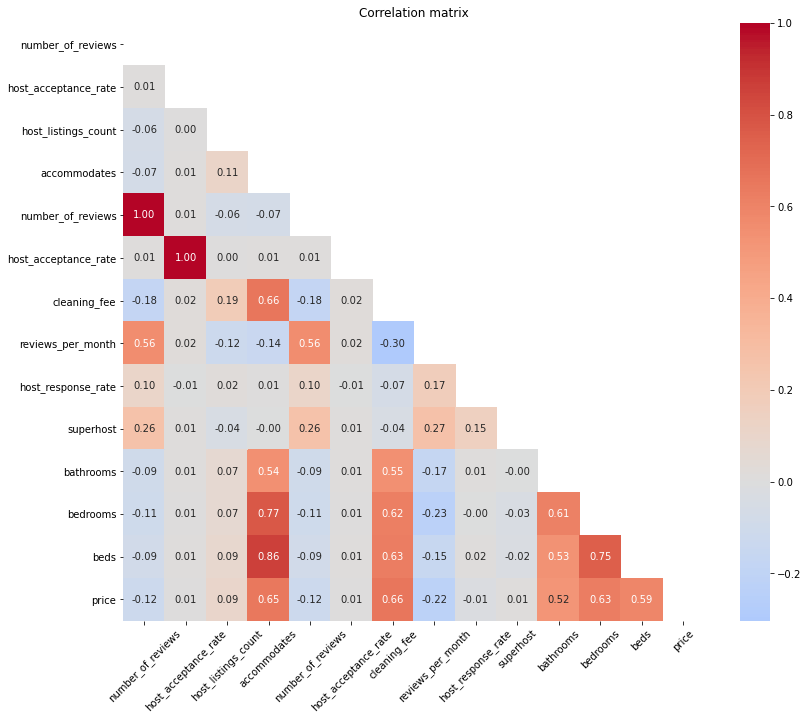

In [408]:
# plot correlation matrix
df1 =dfListing[cols]
plt.figure(figsize = [13,11])

mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(df1.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', center = 0, mask=mask)
plt.title('Correlation matrix');
plt.xticks(rotation=45)
plt.savefig('Correlation matrix')

From the  matrix above we can see that price has strong positive correlations with accommodates, cleaning fee, bedrooms and bathroom. Which is Understandable,listings with more bedrooms & beds should have higher price.

In [370]:
dfListingCOPY = dfListing.copy()

In [371]:
# drop columns that we don't need
cols_to_drop = ['host_id','host_location','host_acceptance_rate','host_neighbourhood',
                'host_total_listings_count', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
                'calendar_updated','listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names',
                'reviews_per_month','host_since','host_verifications','amenities','id','neighbourhood_group_cleansed',
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                 'review_scores_location','cancellation_policy','room_type','host_response_time']


In [372]:
# Make a copy of the Original dataframe
dfListingCOPY = dfListingCOPY.drop(columns = cols_to_drop)

In [373]:
# convert extra_people to numerical value
dfListingCOPY['extra_people'] = dfListingCOPY['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [374]:

dfListingCOPY.head()

,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,superhost
0,96.0,f,3.0,t,t,Apartment,4,1.0,1.0,1.0,Real Bed,85.0,2,5.0,1,365,207,95.0,10.0,10.0,f,f,f,2,0
1,98.0,t,6.0,t,t,Apartment,4,1.0,1.0,1.0,Real Bed,150.0,1,0.0,2,90,43,96.0,10.0,10.0,f,t,t,6,1
2,67.0,f,2.0,t,t,House,11,4.5,5.0,7.0,Real Bed,975.0,10,25.0,4,30,20,97.0,10.0,10.0,f,f,f,2,0
3,NaN,f,1.0,t,t,Apartment,3,1.0,0.0,2.0,Real Bed,100.0,1,0.0,1,1125,0,NaN,NaN,NaN,f,f,f,1,0
4,100.0,f,2.0,t,t,House,6,2.0,3.0,3.0,Real Bed,450.0,6,15.0,1,1125,38,92.0,9.0,9.0,f,f,f,1,0


## Machine Learning 

### Random Forest

In [375]:
#turn categorical variable into dummy variables 
dummy_columns = list(dfListingCOPY.select_dtypes(include=['object']).columns)   

In [376]:
for col in  dummy_columns:
    dfListingCOPY = pd.concat([dfListingCOPY.drop(col, axis=1), pd.get_dummies(dfListingCOPY[col], prefix=col, 
                             prefix_sep='_',drop_first=True, dummy_na=True)], axis=1)

In [377]:
dfListingCOPY.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,superhost,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,96.0,3.0,4,1.0,1.0,1.0,85.0,2,5.0,1,365,207,95.0,10.0,10.0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,98.0,6.0,4,1.0,1.0,1.0,150.0,1,0.0,2,90,43,96.0,10.0,10.0,6,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,67.0,2.0,11,4.5,5.0,7.0,975.0,10,25.0,4,30,20,97.0,10.0,10.0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,NaN,1.0,3,1.0,0.0,2.0,100.0,1,0.0,1,1125,0,NaN,NaN,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,100.0,2.0,6,2.0,3.0,3.0,450.0,6,15.0,1,1125,38,92.0,9.0,9.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [409]:
#spit data into train and test datasets for modeling
TEST_SIZE = 0.3
RAND_STATE = 42

X = dfListingCOPY.drop(columns = 'price')
y = dfListingCOPY[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [410]:
X_test.fillna(X_train.mean(), inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

/Users/Q/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [411]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=RAND_STATE, n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)


Random Forest MSE train: 574.884, test: 3991.211
Random Forest R^2 train: 0.928, test: 0.534


### Evaluate  Random Forest Model

In [433]:


print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_preds)) 
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_preds)) 
print(' ') 
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_preds))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_preds))
print(' ') 
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_preds)))
print(' ') 
print('Test R^2 :', metrics.r2_score(y_test, y_test_preds))
print('Train R^2 :', metrics.r2_score(y_train, y_train_preds))


Test Mean Absolute Error: 38.271580334005726
Train Mean Absolute Error: 13.862405402263656
 
Test Mean Squared Error: 3991.211272583582
Train Mean Squared Error: 574.8843189789256
 
Test Root Mean Squared Error: 63.17603400486281
Train Root Mean Squared Error: 23.97674537919869
 
Test R^2 : 0.5339302394020273
Train R^2 : 0.9277875150692606


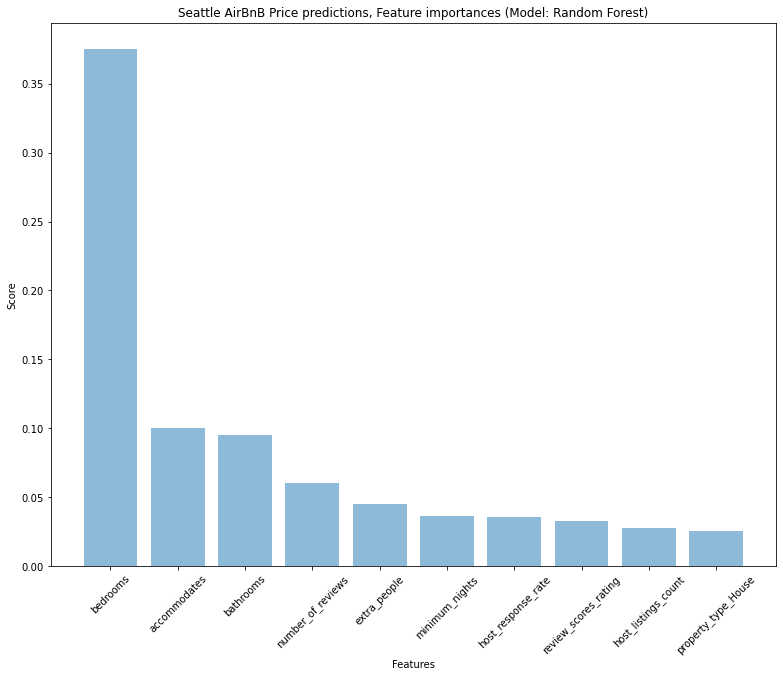

In [423]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:10]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:10]
#plot feature importances
plt.figure(figsize=(13,10))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Seattle AirBnB Price predictions, Feature importances (Model: Random Forest)')
plt.xticks(rotation=45)
plt.savefig('Random Forest, feature importances.png')
plt.show()

### XGBoost model

In [435]:
# XGBoost model
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)


#### Evaluate XGBoost Model

In [436]:
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_preds)) 
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_preds)) 
print(' ') 
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_preds))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_preds))
print(' ') 
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_preds)))
print(' ') 
print('Test R^2 :', metrics.r2_score(y_test, y_test_preds))
print('Train R^2 :', metrics.r2_score(y_train, y_train_preds))


Test Mean Absolute Error: 36.906099406004365
Train Mean Absolute Error: 19.511836854283683
 
Test Mean Squared Error: 3517.0972641190074
Train Mean Squared Error: 899.5649077255279
 
Test Root Mean Squared Error: 59.3051200497816
Train Root Mean Squared Error: 29.992747585466855
 
Test R^2 : 0.5892944352137393
Train R^2 : 0.8870036715234653


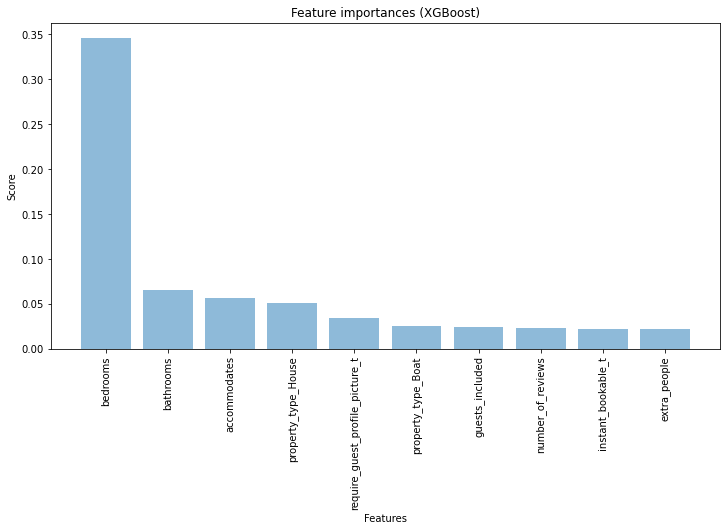

In [387]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#top 10 features
features = xgb_feature_importances['name'][:10]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['score'][:10] 
plt.figure(figsize=(12,6))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')
plt.savefig('feature importances XGBoost Model.png')
plt.show()